# Imports

In [4]:
# import
%matplotlib notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import os 
import csv 
from sqlalchemy import create_engine


In [5]:
# File to Load
file_to_load = "Clean_and_complete_NYC_job.csv"

# Read nyc jobs file into Pandas data frame
raw_jobs_data = pd.read_csv(file_to_load)

raw_jobs_data.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date,New Lat,New Long,Formatted Address,Zip,Borough
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-30T00:00:00.000,40.708793,-74.006836,"110 William St, New York, NY 10038, USA",10038.0,Manhattan
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-30T00:00:00.000,40.708793,-74.006836,"110 William St, New York, NY 10038, USA",10038.0,Manhattan
2,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,...,New York City residency is generally required ...,2013-12-09T00:00:00.000,NaN,2013-12-09T00:00:00.000,2019-07-30T00:00:00.000,40.749357,-73.939062,"42-09 28th St, Long Island City, NY 11101, USA",11101.0,Queens
3,138531,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Associate Chemist,ASSOCIATE CHEMIST,21822,2,"Health Public Safety, Inspections, & Enforcement",F,...,New York City residency is generally required ...,2013-12-20T00:00:00.000,NaN,2014-07-25T00:00:00.000,2019-07-30T00:00:00.000,40.734880,-73.863489,"96-05 Horace Harding Expy, Elmhurst, NY 11373,...",11373.0,Queens
4,152738,LAW DEPARTMENT,Internal,1,Office Manager,CLERICAL ASSOCIATE,10251,3,Clerical & Administrative Support,F,...,New York City residency is generally required ...,2014-06-26T00:00:00.000,NaN,2014-06-26T00:00:00.000,2019-07-30T00:00:00.000,40.713299,-74.010110,"100 Church St, New York, NY 10007, USA",10007.0,Manhattan


In [6]:
raw_jobs_data.shape

(2967, 33)

In [7]:
raw_jobs_data.columns


Index(['Job ID', 'Agency', 'Posting Type', '# Of Positions', 'Business Title',
       'Civil Service Title', 'Title Code No', 'Level', 'Job Category',
       'Full-Time/Part-Time indicator', 'Salary Range From', 'Salary Range To',
       'Salary Frequency', 'Work Location', 'Division/Work Unit',
       'Job Description', 'Minimum Qual Requirements', 'Preferred Skills',
       'Additional Information', 'To Apply', 'Hours/Shift', 'Work Location 1',
       'Recruitment Contact', 'Residency Requirement', 'Posting Date',
       'Post Until', 'Posting Updated', 'Process Date', 'New Lat', 'New Long',
       'Formatted Address', 'Zip', 'Borough'],
      dtype='object')

In [15]:
# rename column headers
# jobs_df.columns = ['jobID', 'agency', 'businessTitle', '#ofPositions', 'jobCategory', 'salaryRangeFrom', 'salaryRangeTo', 'workLocation1']
#jobs_df = jobs_df.rename(columns={'Job ID': 'jobID', 'Agency': 'agency', 'Posting Type': 'postingType', '# Of Positions':'numOfPositions','Business Title': 'businessTitle',  'Civil Service Title': 'civilServiceTitle',\
                                  #'Title Code No': 'titleCodeNo', 'Level': 'level', 'Job Category': 'jobCategory', 'Full-Time/Part-Time indicator': 'fullTimePartTime', 'Salary Range From': 'salaryRangeFrom', 'Salary Range To': 'salaryRangeTo', 'Salary Frequency': 'salaryFrequency', '''Residency Requirement': 'residenceRequirement', 'Posting Date': 'postingDate',\
                                  #'Title Code No': 'titleCodeNo', 'Level': 'level', 'Job Category': 'jobCategory', 'Full-Time/Part-Time indicator': 'fullTimePartTime', 'Salary Range From': 'salaryRangeFrom', 'Salary Range To': 'salaryRangeTo', 'Salary Frequency': 'salaryFrequency', '''Residency Requirement': 'residenceRequirement', 'Posting Date': 'postingDate',\
                                  #'Post Until': 'postUntil', 'Posting Updated': 'postingUpdated', 'Process Date': 'processDate', 'New Lat': 'newLat', 'New Long': 'newLong', 'Formatted Address': 'formattedAddress', 'Zip':'zip', 'Borough': 'borough', 'Work Location 1': 'workLocation1'})

raw_jobs_df = raw_jobs_data.rename(columns={'Job ID':'jobID', 'Agency':'agency', 'Posting Type':'postingType', '# Of Positions':'numOfPositions', 'Business Title':'businessTitle',\
       'Civil Service Title':'civilServiceTitle', 'Title Code No':'titleCodeNo', 'Level':'level', 'Job Category':'jobCategory',\
       'Full-Time/Part-Time indicator':'fullTimePartTime', 'Salary Range From':'salaryRangeFrom', 'Salary Range To':'salaryRangeTo',\
       'Salary Frequency':'salaryFrequency', 'Work Location':'workLocation', 'Division/Work Unit':'divisionWorkUnit',\
       'Job Description':'jobDescripton', 'Minimum Qual Requirements':'minQualRequirements', 'Preferred Skills':'preferredSkills',\
       'Additional Information':'additionalInformation', 'To Apply':'toApply', 'Hours/Shift':'hoursShift', 'Work Location 1':'workLocation1',\
       'Recruitment Contact':'recruitmentContact', 'Residency Requirement':'residencyRequirement', 'Posting Date':'postingDate',\
       'Post Until':'postUntil', 'Posting Updated':'postingUpdated', 'Process Date':'processDate', 'New Lat':'newLat', 'New Long':'newLong',\
       'Formatted Address':'formattedAddress', 'Zip':'zip', 'Borough':'borough' })

 # name the index column
raw_jobs_df.index.name = 'index'
raw_jobs_df.head()

,jobID,agency,postingType,numOfPositions,businessTitle,civilServiceTitle,titleCodeNo,level,jobCategory,fullTimePartTime,...,residencyRequirement,postingDate,postUntil,postingUpdated,processDate,newLat,newLong,formattedAddress,zip,borough
index,,,,,,,,,,,,,,,,,,,,,
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-07-30T00:00:00.000,40.708793,-74.006836,"110 William St, New York, NY 10038, USA",10038.0,Manhattan
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-07-30T00:00:00.000,40.708793,-74.006836,"110 William St, New York, NY 10038, USA",10038.0,Manhattan
2,137433,DEPT OF HEALTH/MENTAL HYGIENE,Internal,1,Contract Analyst,PROCUREMENT ANALYST,12158,3,"Finance, Accounting, & Procurement",F,...,New York City residency is generally required ...,2013-12-09T00:00:00.000,NaN,2013-12-09T00:00:00.000,2019-07-30T00:00:00.000,40.749357,-73.939062,"42-09 28th St, Long Island City, NY 11101, USA",11101.0,Queens
3,138531,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Associate Chemist,ASSOCIATE CHEMIST,21822,2,"Health Public Safety, Inspections, & Enforcement",F,...,New York City residency is generally required ...,2013-12-20T00:00:00.000,NaN,2014-07-25T00:00:00.000,2019-07-30T00:00:00.000,40.734880,-73.863489,"96-05 Horace Harding Expy, Elmhurst, NY 11373,...",11373.0,Queens
4,152738,LAW DEPARTMENT,Internal,1,Office Manager,CLERICAL ASSOCIATE,10251,3,Clerical & Administrative Support,F,...,New York City residency is generally required ...,2014-06-26T00:00:00.000,NaN,2014-06-26T00:00:00.000,2019-07-30T00:00:00.000,40.713299,-74.010110,"100 Church St, New York, NY 10007, USA",10007.0,Manhattan


In [16]:
# subset the data using only the columns necessary for the project
raw_jobs_df = raw_jobs_df[['agency', 'numOfPositions', 'businessTitle', 'jobCategory', 'newLat', 'newLong', 'borough', 'salaryRangeTo', 'salaryRangeFrom', 'salaryFrequency', 'zip']]
raw_jobs_df.head()

,agency,numOfPositions,businessTitle,jobCategory,newLat,newLong,borough,salaryRangeTo,salaryRangeFrom,salaryFrequency,zip
index,,,,,,,,,,,
0,DEPARTMENT OF BUSINESS SERV.,1,Account Manager,NaN,40.708793,-74.006836,Manhattan,65485.0,42405.0,Annual,10038.0
1,DEPARTMENT OF BUSINESS SERV.,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",NaN,40.708793,-74.006836,Manhattan,162014.0,60740.0,Annual,10038.0
2,DEPT OF HEALTH/MENTAL HYGIENE,1,Contract Analyst,"Finance, Accounting, & Procurement",40.749357,-73.939062,Queens,85053.0,50598.0,Annual,11101.0
3,DEPT OF ENVIRONMENT PROTECTION,1,Associate Chemist,"Health Public Safety, Inspections, & Enforcement",40.734880,-73.863489,Queens,75083.0,50623.0,Annual,11373.0
4,LAW DEPARTMENT,1,Office Manager,Clerical & Administrative Support,40.713299,-74.010110,Manhattan,49707.0,30683.0,Annual,10007.0


In [17]:
raw_jobs_df.shape

(2967, 11)

In [18]:
# noNanJobs_df['postUntil'] = raw_jobs_df.dropna()
# noNanJobs_df.head()

# joe_df = raw_jobs_df.drop('postUntil', 1)
# joe_df = joe_df.drop('recruitmentContact', 1)

# joe_df

noNaNJobs_df = raw_jobs_df.dropna()
noNaNJobs_df.head()


,agency,numOfPositions,businessTitle,jobCategory,newLat,newLong,borough,salaryRangeTo,salaryRangeFrom,salaryFrequency,zip
index,,,,,,,,,,,
2,DEPT OF HEALTH/MENTAL HYGIENE,1,Contract Analyst,"Finance, Accounting, & Procurement",40.749357,-73.939062,Queens,85053.0,50598.0,Annual,11101.0
3,DEPT OF ENVIRONMENT PROTECTION,1,Associate Chemist,"Health Public Safety, Inspections, & Enforcement",40.734880,-73.863489,Queens,75083.0,50623.0,Annual,11373.0
4,LAW DEPARTMENT,1,Office Manager,Clerical & Administrative Support,40.713299,-74.010110,Manhattan,49707.0,30683.0,Annual,10007.0
5,DEPT OF INFO TECH & TELECOMM,1,"Deputy Director, Audits and Accounts","Finance, Accounting, & Procurement",40.714463,-74.010980,Manhattan,60000.0,49492.0,Annual,10007.0
6,NYC EMPLOYEES RETIREMENT SYS,1,"CERTIFIED IT ADMINISTRATOR (WAN), Level 4",Information Technology & Telecommunications,40.693463,-73.988245,Brooklyn,131623.0,87203.0,Annual,11201.0


In [19]:
noNaNJobs_df.shape

(2965, 11)

In [20]:
# find unique job categories

noNaNJobs_df.jobCategory.unique()

array(['Finance, Accounting, & Procurement',
       'Health Public Safety, Inspections, & Enforcement',
       'Clerical & Administrative Support',
       'Information Technology & Telecommunications',
       'Finance, Accounting, & Procurement Information Technology & Telecommunications',
       'Community & Business Services',
       'Clerical & Administrative Support Legal',
       'Clerical & Administrative Support Community & Business Services',
       'Social Services',
       'Engineering, Architecture, & Planning Maintenance & Operations',
       'Health', 'Maintenance & Operations',
       'Clerical & Administrative Support Policy & Analysis',
       'Community & Business Services Social Services',
       'Public Safety, Inspections, & Enforcement',
       'Policy & Analysis Social Services',
       'Information Technology & Telecommunications Policy & Analysis Social Services',
       'Legal Policy & Analysis', 'Engineering, Architecture, & Planning',
       'Finance, Account

In [21]:
noNaNJobs_df["jobCatCondensed"] =""
noNaNJobs_df.iterrows()

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<generator object DataFrame.iterrows at 0x11ad93678>

In [22]:
for index, row in noNaNJobs_df.iterrows():
    print(row['jobCategory'])
    print(f"index:{index}")
    if (('Clerical') or ('Technology') or ('Administration')) in row[ 'jobCategory']:
        noNaNJobs_df.loc[index, 'jobCatCondensed'] = 'Technical, Sales, and Administrative'
        
        print("assigning technical")
    elif (('Public Safety') or ('Engineering') or ('Finance') or ('Communications') or ('Legal')) in row[ 'jobCategory']:
        noNaNJobs_df.loc[index, 'jobCatCondensed'] = 'Managerial and Professional'
        print("assigning managerial")
    elif ('Operations') in row[ 'jobCategory']:
        noNaNJobs_df.loc[index, 'jobCatCondensed'] = 'Operatives and Laborers'
        print("assigning operative")
    elif 'Services' in row[ 'jobCategory']:
        noNaNJobs_df.loc[index, 'jobCatCondensed'] = 'Service'
        print("assigning service")
    else: 
        noNaNJobs_df.loc[index, 'jobCatCondensed'] = 'Other'
        print("assigning other")
        
noNaNJobs_df.shape

Finance, Accounting, & Procurement
index:2
assigning other
Health Public Safety, Inspections, & Enforcement
index:3
assigning managerial
Clerical & Administrative Support
index:4
assigning technical
Finance, Accounting, & Procurement
index:5
assigning other
Information Technology & Telecommunications
index:6
assigning other
Information Technology & Telecommunications
index:7
assigning other
Clerical & Administrative Support
index:8


/anaconda3/envs/PythonData/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


assigning technical
Clerical & Administrative Support
index:9
assigning technical
Clerical & Administrative Support
index:10
assigning technical
Finance, Accounting, & Procurement Information Technology & Telecommunications
index:11
assigning other
Community & Business Services
index:12
assigning service
Clerical & Administrative Support
index:13
assigning technical
Information Technology & Telecommunications
index:14
assigning other
Finance, Accounting, & Procurement
index:15
assigning other
Finance, Accounting, & Procurement
index:16
assigning other
Information Technology & Telecommunications
index:17
assigning other
Clerical & Administrative Support
index:18
assigning technical
Information Technology & Telecommunications
index:19
assigning other
Clerical & Administrative Support Legal
index:20
assigning technical
Information Technology & Telecommunications
index:21
assigning other
Information Technology & Telecommunications
index:22
assigning other
Clerical & Administrative Support 

assigning other
Engineering, Architecture, & Planning
index:147
assigning other
Technology, Data & Innovation
index:148
assigning other
Engineering, Architecture, & Planning
index:149
assigning other
Engineering, Architecture, & Planning
index:150
assigning other
Administration & Human Resources
index:151
assigning other
Administration & Human Resources
index:152
assigning other
Engineering, Architecture, & Planning
index:153
assigning other
Engineering, Architecture, & Planning
index:154
assigning other
Social Services
index:155
assigning service
Social Services
index:156
assigning service
Engineering, Architecture, & Planning
index:157
assigning other
Engineering, Architecture, & Planning
index:158
assigning other
Engineering, Architecture, & Planning
index:159
assigning other
Engineering, Architecture, & Planning
index:160
assigning other
Public Safety, Inspections, & Enforcement
index:161
assigning managerial
Public Safety, Inspections, & Enforcement
index:162
assigning managerial


assigning other
Engineering, Architecture, & Planning
index:267
assigning other
Engineering, Architecture, & Planning
index:268
assigning other
Engineering, Architecture, & Planning
index:269
assigning other
Engineering, Architecture, & Planning
index:270
assigning other
Engineering, Architecture, & Planning
index:271
assigning other
Engineering, Architecture, & Planning
index:272
assigning other
Building Operations & Maintenance
index:273
assigning operative
Legal Affairs Policy, Research & Analysis
index:274
assigning other
Legal Affairs Policy, Research & Analysis
index:275
assigning other
Engineering, Architecture, & Planning
index:276
assigning other
Engineering, Architecture, & Planning
index:277
assigning other
Finance, Accounting, & Procurement
index:278
assigning other
Building Operations & Maintenance
index:279
assigning operative
Building Operations & Maintenance
index:280
assigning operative
Engineering, Architecture, & Planning
index:281
assigning other
Engineering, Archit

assigning other
Finance, Accounting, & Procurement
index:390
assigning other
Finance, Accounting, & Procurement
index:391
assigning other
Engineering, Architecture, & Planning Finance, Accounting, & Procurement Building Operations & Maintenance Public Safety, Inspections, & Enforcement
index:392
assigning managerial
Engineering, Architecture, & Planning Finance, Accounting, & Procurement Building Operations & Maintenance Public Safety, Inspections, & Enforcement
index:393
assigning managerial
Engineering, Architecture, & Planning
index:394
assigning other
Engineering, Architecture, & Planning
index:395
assigning other
Health
index:396
assigning other
Administration & Human Resources
index:397
assigning other
Administration & Human Resources
index:398
assigning other
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement
index:399
assigning managerial
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement
index:400
assigning managerial
E

assigning other
Engineering, Architecture, & Planning Technology, Data & Innovation
index:515
assigning other
Engineering, Architecture, & Planning Technology, Data & Innovation
index:516
assigning other
Engineering, Architecture, & Planning
index:517
assigning other
Engineering, Architecture, & Planning
index:518
assigning other
Constituent Services & Community Programs
index:519
assigning service
Constituent Services & Community Programs
index:520
assigning service
Finance, Accounting, & Procurement
index:521
assigning other
Public Safety, Inspections, & Enforcement
index:522
assigning managerial
Public Safety, Inspections, & Enforcement
index:523
assigning managerial
Communications & Intergovernmental Affairs
index:524
assigning other
Communications & Intergovernmental Affairs
index:525
assigning other
Constituent Services & Community Programs
index:526
assigning service
Constituent Services & Community Programs
index:527
assigning service
Finance, Accounting, & Procurement
index:52

assigning operative
Building Operations & Maintenance
index:637
assigning operative
Engineering, Architecture, & Planning
index:638
assigning other
Engineering, Architecture, & Planning
index:639
assigning other
Engineering, Architecture, & Planning
index:640
assigning other
Health Policy, Research & Analysis
index:641
assigning other
Engineering, Architecture, & Planning Finance, Accounting, & Procurement
index:642
assigning other
Engineering, Architecture, & Planning Finance, Accounting, & Procurement
index:643
assigning other
Engineering, Architecture, & Planning
index:644
assigning other
Engineering, Architecture, & Planning
index:645
assigning other
Engineering, Architecture, & Planning
index:646
assigning other
Engineering, Architecture, & Planning
index:647
assigning other
Engineering, Architecture, & Planning
index:648
assigning other
Engineering, Architecture, & Planning
index:649
assigning other
Engineering, Architecture, & Planning Finance, Accounting, & Procurement
index:65

assigning other
Technology, Data & Innovation
index:759
assigning other
Technology, Data & Innovation
index:760
assigning other
Technology, Data & Innovation
index:761
assigning other
Technology, Data & Innovation
index:762
assigning other
Technology, Data & Innovation
index:763
assigning other
Technology, Data & Innovation
index:764
assigning other
Engineering, Architecture, & Planning Technology, Data & Innovation
index:765
assigning other
Engineering, Architecture, & Planning Technology, Data & Innovation
index:766
assigning other
Administration & Human Resources Finance, Accounting, & Procurement
index:767
assigning other
Administration & Human Resources Finance, Accounting, & Procurement
index:768
assigning other
Legal Affairs Policy, Research & Analysis Public Safety, Inspections, & Enforcement
index:769
assigning managerial
Legal Affairs Policy, Research & Analysis Public Safety, Inspections, & Enforcement
index:770
assigning managerial
Engineering, Architecture, & Planning Fina

assigning managerial
Finance, Accounting, & Procurement
index:877
assigning other
Finance, Accounting, & Procurement
index:878
assigning other
Health Building Operations & Maintenance
index:879
assigning operative
Health Building Operations & Maintenance
index:880
assigning operative
Legal Affairs
index:881
assigning other
Legal Affairs
index:882
assigning other
Technology, Data & Innovation
index:883
assigning other
Technology, Data & Innovation
index:884
assigning other
Public Safety, Inspections, & Enforcement
index:885
assigning managerial
Public Safety, Inspections, & Enforcement
index:886
assigning managerial
Health
index:887
assigning other
Health
index:888
assigning other
Policy, Research & Analysis Public Safety, Inspections, & Enforcement
index:889
assigning managerial
Policy, Research & Analysis Public Safety, Inspections, & Enforcement
index:890
assigning managerial
Health
index:891
assigning other
Health
index:892
assigning other
Administration & Human Resources
index:893


index:1016
assigning other
Engineering, Architecture, & Planning
index:1017
assigning other
Legal Affairs
index:1018
assigning other
Legal Affairs
index:1019
assigning other
Public Safety, Inspections, & Enforcement
index:1020
assigning managerial
Public Safety, Inspections, & Enforcement
index:1021
assigning managerial
Engineering, Architecture, & Planning
index:1022
assigning other
Engineering, Architecture, & Planning
index:1023
assigning other
Engineering, Architecture, & Planning
index:1024
assigning other
Engineering, Architecture, & Planning
index:1025
assigning other
Engineering, Architecture, & Planning
index:1026
assigning other
Engineering, Architecture, & Planning
index:1027
assigning other
Engineering, Architecture, & Planning
index:1028
assigning other
Engineering, Architecture, & Planning
index:1029
assigning other
Engineering, Architecture, & Planning
index:1030
assigning other
Engineering, Architecture, & Planning
index:1031
assigning other
Finance, Accounting, & Procu

assigning other
Building Operations & Maintenance
index:1149
assigning operative
Public Safety, Inspections, & Enforcement
index:1150
assigning managerial
Public Safety, Inspections, & Enforcement
index:1151
assigning managerial
Building Operations & Maintenance
index:1152
assigning operative
Building Operations & Maintenance
index:1153
assigning operative
Finance, Accounting, & Procurement Policy, Research & Analysis
index:1154
assigning other
Finance, Accounting, & Procurement Policy, Research & Analysis
index:1155
assigning other
Engineering, Architecture, & Planning
index:1156
assigning other
Engineering, Architecture, & Planning
index:1157
assigning other
Constituent Services & Community Programs Communications & Intergovernmental Affairs
index:1158
assigning service
Constituent Services & Community Programs Communications & Intergovernmental Affairs
index:1159
assigning service
Engineering, Architecture, & Planning
index:1160
assigning other
Engineering, Architecture, & Planning


assigning other
Health
index:1286
assigning other
Technology, Data & Innovation
index:1287
assigning other
Technology, Data & Innovation
index:1288
assigning other
Health
index:1289
assigning other
Health
index:1290
assigning other
Engineering, Architecture, & Planning
index:1291
assigning other
Engineering, Architecture, & Planning
index:1292
assigning other
Constituent Services & Community Programs
index:1293
assigning service
Constituent Services & Community Programs
index:1294
assigning service
Policy, Research & Analysis
index:1295
assigning other
Policy, Research & Analysis
index:1296
assigning other
Technology, Data & Innovation
index:1297
assigning other
Technology, Data & Innovation
index:1298
assigning other
Public Safety, Inspections, & Enforcement
index:1299
assigning managerial
Public Safety, Inspections, & Enforcement
index:1300
assigning managerial
Public Safety, Inspections, & Enforcement
index:1301
assigning managerial
Public Safety, Inspections, & Enforcement
index:13

assigning other
Technology, Data & Innovation
index:1407
assigning other
Technology, Data & Innovation
index:1408
assigning other
Social Services
index:1409
assigning service
Technology, Data & Innovation
index:1410
assigning other
Technology, Data & Innovation
index:1411
assigning other
Social Services
index:1412
assigning service
Finance, Accounting, & Procurement Building Operations & Maintenance
index:1413
assigning operative
Engineering, Architecture, & Planning Building Operations & Maintenance
index:1414
assigning operative
Technology, Data & Innovation
index:1415
assigning other
Technology, Data & Innovation
index:1416
assigning other
Technology, Data & Innovation
index:1417
assigning other
Technology, Data & Innovation
index:1418
assigning other
Engineering, Architecture, & Planning
index:1419
assigning other
Engineering, Architecture, & Planning
index:1420
assigning other
Finance, Accounting, & Procurement
index:1421
assigning other
Finance, Accounting, & Procurement
index:14

assigning managerial
Health
index:1535
assigning other
Health
index:1536
assigning other
Engineering, Architecture, & Planning
index:1537
assigning other
Engineering, Architecture, & Planning
index:1538
assigning other
Engineering, Architecture, & Planning
index:1539
assigning other
Engineering, Architecture, & Planning
index:1540
assigning other
Engineering, Architecture, & Planning
index:1541
assigning other
Engineering, Architecture, & Planning
index:1542
assigning other
Finance, Accounting, & Procurement Technology, Data & Innovation Legal Affairs Policy, Research & Analysis
index:1543
assigning other
Finance, Accounting, & Procurement Technology, Data & Innovation Legal Affairs Policy, Research & Analysis
index:1544
assigning other
Building Operations & Maintenance
index:1545
assigning operative
Building Operations & Maintenance
index:1546
assigning operative
Engineering, Architecture, & Planning
index:1547
assigning other
Engineering, Architecture, & Planning
index:1548
assigning

assigning other
Administration & Human Resources
index:1646
assigning other
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement
index:1647
assigning managerial
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement
index:1648
assigning managerial
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement
index:1649
assigning managerial
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement
index:1650
assigning managerial
Technology, Data & Innovation
index:1651
assigning other
Technology, Data & Innovation
index:1652
assigning other
Public Safety, Inspections, & Enforcement
index:1653
assigning managerial
Public Safety, Inspections, & Enforcement
index:1654
assigning managerial
Engineering, Architecture, & Planning
index:1655
assigning other
Engineering, Architecture, & Planning
index:1656
assigning other
Public Safety, Inspections, & Enforcement
index:1657
assigning managerial
Public Saf

assigning other
Administration & Human Resources
index:1762
assigning other
Administration & Human Resources
index:1763
assigning other
Social Services
index:1764
assigning service
Legal Affairs
index:1765
assigning other
Legal Affairs
index:1766
assigning other
Administration & Human Resources Finance, Accounting, & Procurement Public Safety, Inspections, & Enforcement Social Services
index:1767
assigning managerial
Public Safety, Inspections, & Enforcement
index:1768
assigning managerial
Public Safety, Inspections, & Enforcement
index:1769
assigning managerial
Technology, Data & Innovation
index:1770
assigning other
Technology, Data & Innovation
index:1771
assigning other
Public Safety, Inspections, & Enforcement
index:1772
assigning managerial
Public Safety, Inspections, & Enforcement
index:1773
assigning managerial
Finance, Accounting, & Procurement Policy, Research & Analysis
index:1774
assigning other
Finance, Accounting, & Procurement Policy, Research & Analysis
index:1775
assig

assigning service
Public Safety, Inspections, & Enforcement
index:1874
assigning managerial
Public Safety, Inspections, & Enforcement
index:1875
assigning managerial
Administration & Human Resources Finance, Accounting, & Procurement Health Social Services
index:1876
assigning service
Engineering, Architecture, & Planning
index:1877
assigning other
Engineering, Architecture, & Planning
index:1878
assigning other
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement
index:1879
assigning managerial
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement
index:1880
assigning managerial
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement
index:1881
assigning managerial
Engineering, Architecture, & Planning Public Safety, Inspections, & Enforcement
index:1882
assigning managerial
Constituent Services & Community Programs
index:1883
assigning service
Constituent Services & Community Programs
index:1884
assigning se

assigning other
Policy, Research & Analysis
index:1978
assigning other
Policy, Research & Analysis
index:1979
assigning other
Legal Affairs
index:1980
assigning other
Legal Affairs
index:1981
assigning other
Health
index:1982
assigning other
Health
index:1983
assigning other
Legal Affairs
index:1984
assigning other
Legal Affairs
index:1985
assigning other
Public Safety, Inspections, & Enforcement
index:1986
assigning managerial
Public Safety, Inspections, & Enforcement
index:1987
assigning managerial
Constituent Services & Community Programs
index:1988
assigning service
Constituent Services & Community Programs
index:1989
assigning service
Constituent Services & Community Programs Communications & Intergovernmental Affairs
index:1990
assigning service
Constituent Services & Community Programs Communications & Intergovernmental Affairs
index:1991
assigning service
Public Safety, Inspections, & Enforcement
index:1992
assigning managerial
Public Safety, Inspections, & Enforcement
index:19

assigning service
Engineering, Architecture, & Planning
index:2107
assigning other
Engineering, Architecture, & Planning
index:2108
assigning other
Constituent Services & Community Programs
index:2109
assigning service
Constituent Services & Community Programs
index:2110
assigning service
Constituent Services & Community Programs
index:2111
assigning service
Constituent Services & Community Programs
index:2112
assigning service
Constituent Services & Community Programs
index:2113
assigning service
Constituent Services & Community Programs
index:2114
assigning service
Constituent Services & Community Programs
index:2115
assigning service
Constituent Services & Community Programs
index:2116
assigning service
Constituent Services & Community Programs
index:2117
assigning service
Constituent Services & Community Programs
index:2118
assigning service
Public Safety, Inspections, & Enforcement
index:2119
assigning managerial
Public Safety, Inspections, & Enforcement
index:2120
assigning manag

assigning service
Policy, Research & Analysis
index:2224
assigning other
Policy, Research & Analysis
index:2225
assigning other
Technology, Data & Innovation
index:2226
assigning other
Technology, Data & Innovation
index:2227
assigning other
Engineering, Architecture, & Planning
index:2228
assigning other
Engineering, Architecture, & Planning
index:2229
assigning other
Engineering, Architecture, & Planning
index:2230
assigning other
Communications & Intergovernmental Affairs Building Operations & Maintenance Policy, Research & Analysis
index:2231
assigning operative
Communications & Intergovernmental Affairs Building Operations & Maintenance Policy, Research & Analysis
index:2232
assigning operative
Constituent Services & Community Programs
index:2233
assigning service
Engineering, Architecture, & Planning Finance, Accounting, & Procurement Policy, Research & Analysis
index:2234
assigning other
Engineering, Architecture, & Planning Finance, Accounting, & Procurement Policy, Research & 

assigning service
Administration & Human Resources
index:2354
assigning other
Administration & Human Resources
index:2355
assigning other
Engineering, Architecture, & Planning
index:2356
assigning other
Engineering, Architecture, & Planning
index:2357
assigning other
Health
index:2358
assigning other
Health
index:2359
assigning other
Engineering, Architecture, & Planning
index:2360
assigning other
Engineering, Architecture, & Planning
index:2361
assigning other
Engineering, Architecture, & Planning Policy, Research & Analysis
index:2362
assigning other
Engineering, Architecture, & Planning Policy, Research & Analysis
index:2363
assigning other
Administration & Human Resources
index:2364
assigning other
Administration & Human Resources
index:2365
assigning other
Constituent Services & Community Programs Communications & Intergovernmental Affairs
index:2366
assigning service
Constituent Services & Community Programs Communications & Intergovernmental Affairs
index:2367
assigning service


assigning other
Administration & Human Resources
index:2474
assigning other
Administration & Human Resources
index:2475
assigning other
Finance, Accounting, & Procurement
index:2476
assigning other
Finance, Accounting, & Procurement
index:2477
assigning other
Administration & Human Resources
index:2478
assigning other
Administration & Human Resources
index:2479
assigning other
Technology, Data & Innovation Social Services
index:2480
assigning service
Public Safety, Inspections, & Enforcement
index:2481
assigning managerial
Public Safety, Inspections, & Enforcement
index:2482
assigning managerial
Public Safety, Inspections, & Enforcement
index:2483
assigning managerial
Building Operations & Maintenance
index:2484
assigning operative
Policy, Research & Analysis
index:2485
assigning other
Policy, Research & Analysis
index:2486
assigning other
Building Operations & Maintenance
index:2487
assigning operative
Building Operations & Maintenance
index:2488
assigning operative
Building Operation

assigning managerial
Public Safety, Inspections, & Enforcement
index:2594
assigning managerial
Finance, Accounting, & Procurement Policy, Research & Analysis
index:2595
assigning other
Finance, Accounting, & Procurement Policy, Research & Analysis
index:2596
assigning other
Finance, Accounting, & Procurement
index:2597
assigning other
Finance, Accounting, & Procurement
index:2598
assigning other
Building Operations & Maintenance
index:2599
assigning operative
Engineering, Architecture, & Planning
index:2600
assigning other
Engineering, Architecture, & Planning
index:2601
assigning other
Administration & Human Resources
index:2602
assigning other
Administration & Human Resources
index:2603
assigning other
Communications & Intergovernmental Affairs Technology, Data & Innovation Policy, Research & Analysis
index:2604
assigning other
Communications & Intergovernmental Affairs Technology, Data & Innovation Policy, Research & Analysis
index:2605
assigning other
Legal Affairs
index:2606
assig

assigning service
Administration & Human Resources Finance, Accounting, & Procurement
index:2710
assigning other
Administration & Human Resources Finance, Accounting, & Procurement
index:2711
assigning other
Policy, Research & Analysis
index:2712
assigning other
Policy, Research & Analysis
index:2713
assigning other
Engineering, Architecture, & Planning
index:2714
assigning other
Engineering, Architecture, & Planning
index:2715
assigning other
Public Safety, Inspections, & Enforcement
index:2716
assigning managerial
Public Safety, Inspections, & Enforcement
index:2717
assigning managerial
Policy, Research & Analysis
index:2718
assigning other
Policy, Research & Analysis
index:2719
assigning other
Engineering, Architecture, & Planning
index:2720
assigning other
Engineering, Architecture, & Planning
index:2721
assigning other
Finance, Accounting, & Procurement
index:2722
assigning other
Finance, Accounting, & Procurement
index:2723
assigning other
Administration & Human Resources Public 

assigning other
Technology, Data & Innovation
index:2838
assigning other
Engineering, Architecture, & Planning
index:2839
assigning other
Engineering, Architecture, & Planning
index:2840
assigning other
Building Operations & Maintenance
index:2841
assigning operative
Building Operations & Maintenance
index:2842
assigning operative
Public Safety, Inspections, & Enforcement
index:2843
assigning managerial
Public Safety, Inspections, & Enforcement
index:2844
assigning managerial
Engineering, Architecture, & Planning
index:2845
assigning other
Engineering, Architecture, & Planning
index:2846
assigning other
Public Safety, Inspections, & Enforcement
index:2847
assigning managerial
Engineering, Architecture, & Planning
index:2848
assigning other
Technology, Data & Innovation
index:2849
assigning other
Legal Affairs
index:2850
assigning other
Legal Affairs
index:2851
assigning other
Legal Affairs
index:2852
assigning other
Legal Affairs
index:2853
assigning other
Engineering, Architecture, & 

assigning managerial
Engineering, Architecture, & Planning Finance, Accounting, & Procurement Policy, Research & Analysis
index:2958
assigning other
Engineering, Architecture, & Planning Finance, Accounting, & Procurement Policy, Research & Analysis
index:2959
assigning other
Administration & Human Resources Constituent Services & Community Programs Communications & Intergovernmental Affairs Engineering, Architecture, & Planning Finance, Accounting, & Procurement Health Technology, Data & Innovation Legal Affairs Building Operations & Maintenance Policy, Research & Analysis Public Safety, Inspections, & Enforcement Social Services
index:2960
assigning managerial
Constituent Services & Community Programs
index:2961
assigning service
Constituent Services & Community Programs
index:2962
assigning service
Policy, Research & Analysis
index:2963
assigning other
Policy, Research & Analysis
index:2964
assigning other
Engineering, Architecture, & Planning
index:2965
assigning other
Engineering,

(2965, 12)

In [23]:
noNaNJobs_df['jobCatCondensed'].value_counts()

Other                                   1994
Managerial and Professional              424
Service                                  339
Operatives and Laborers                  189
Technical, Sales, and Administrative      19
Name: jobCatCondensed, dtype: int64

In [24]:
# create pie charts for jobs categories

# Labels for the sections of our pie chart
labels = ['Tech, Sales, & Admin', 'MGT & Professional', 'Ops and Labor', 'Service', 'Other']

# The values of each section of the pie chart
sizes = [4, 49, 23, 14, 234]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0, 0, 0.1)

<IPython.core.display.Javascript object>


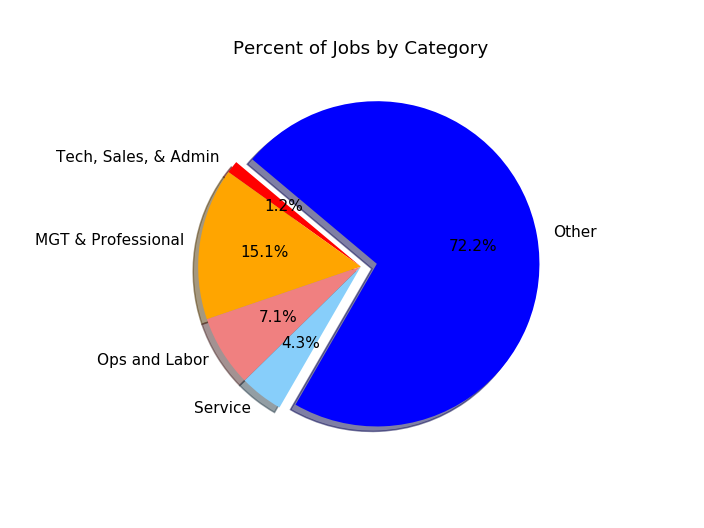

Text(0.5, 1.0, 'Percent of Jobs by Category')

In [32]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Percent of Jobs by Category")

In [33]:
plt.savefig('jobSectorPieChart.png')

In [34]:
noNaNJobs_df['jobCatCondensed'].unique()

array(['Other', 'Managerial and Professional',
       'Technical, Sales, and Administrative', 'Service',
       'Operatives and Laborers'], dtype=object)

In [35]:
noNaNJobs_df.dtypes

agency              object
numOfPositions       int64
businessTitle       object
jobCategory         object
newLat             float64
newLong            float64
borough             object
salaryRangeTo      float64
salaryRangeFrom    float64
salaryFrequency     object
zip                float64
jobCatCondensed     object
dtype: object

In [36]:
# save to output file
noNaNJobs_df.to_csv("completeAndCleanNycJobs_kh.csv")